In [1]:
import io
import os

import numpy as np

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

import cv2
import matplotlib.pyplot as plt
# % matplotlib inline

In [2]:
# Instantiates a client
client = vision.ImageAnnotatorClient()

In [3]:
def read_image(path):
    # Loads the image into memory
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = types.Image(content=content)

    return image

In [4]:
### label detection

# The name of the image file to annotate
file_name_eiffle = '/media/leetwito/Windows/Users/leetw/PycharmProjects/GcloudVision/example_images/eiffel.jpeg'

image = read_image(file_name_eiffle)

# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

Labels:
Landmark
Tower
Monument
Architecture
Tourist attraction
Spire
National historic landmark
Sky
Wonders of the world
Tourism


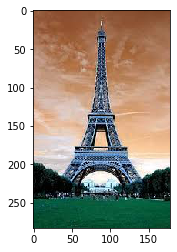

In [5]:
eiffle_image = cv2.imread(file_name_eiffle)
plt.imshow(eiffle_image)
plt.show()

In [6]:
### text detection + OCR

# The name of the image file to annotate
file_name_menu = '/media/leetwito/Windows/Users/leetw/PycharmProjects/GcloudVision/example_images/menu_2.jpeg'

image = read_image(file_name_menu)

# Performs label detection on the image file
text_detection_response = client.text_detection(image=image)
annotations = text_detection_response.text_annotations
if len(annotations) > 0:
    text = annotations[0].description
else:
    text = ''

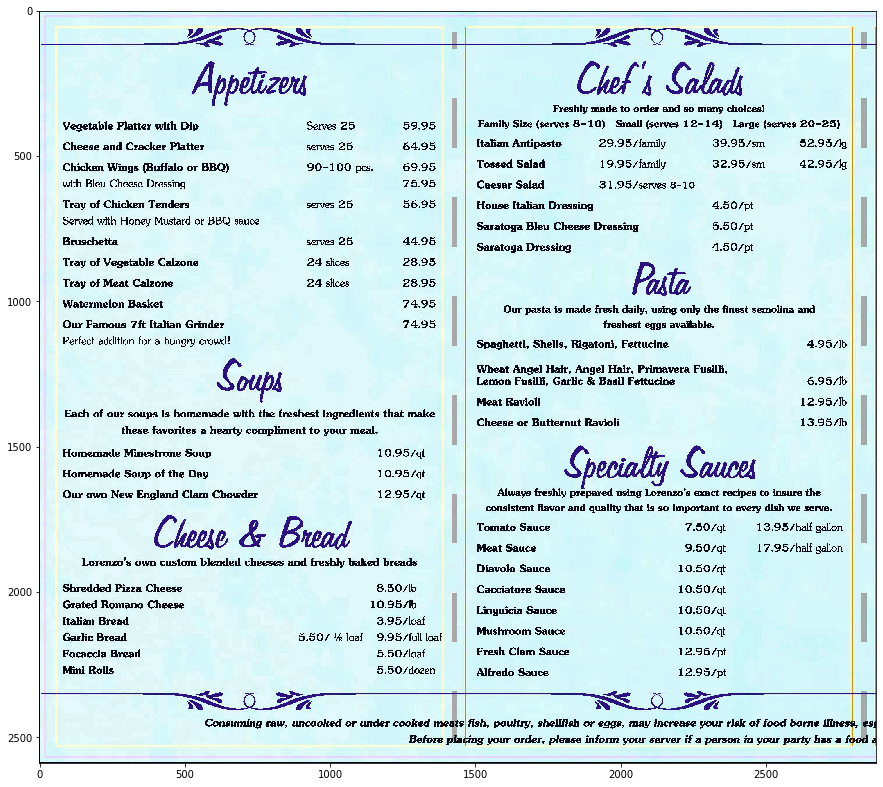

In [7]:
plt.figure(figsize=(15, 15))
menu_image = cv2.imread(file_name_menu)
plt.imshow(menu_image)
plt.show()

In [8]:
print('Extracted text:\n {} from image ({} chars).'.format(text, len(text)))

Extracted text:
 Chef's Salads
Appetizers
Freshly made to order and so many choices!
Family Size (serves 8-10) Small (serves 12-14) Large (serves 20-25)
Serves 25
Vegetable Platter with Dip
59.95
29.95/family
52.95/lg
Italian Antipasto
39.95/sm
Cheese and Cracker Platter
64.95
serves 25
19.95/family
32.95/sm
42.95/lg
Tossed Salad
90-100 pcs.
Chicken Wings (Buffalo or
ВВО)
69.95
with Bleu Cheese Dressing
75.95
31.95/serves 8-10
Caesar Salad
56.95
Tray of Chicken Tenders
House Italian Dressing
4.50/pt
serves 25
Served with Honey Mustard or
BBQ sauce
5.50/pt
Saratoga Bleu Cheese Dressing
Bruschetta
44.95
serves 25
4.50/pt
Saratoga Dressing
24 slices
Tray of Vegetable Calzone
28.95
Pasta
24 slices
28.95
Tray of Meat Calzone
Watermelon Basket
74.95
Our pasta is made fresh daily, using only the finest semolina and
Our Famous 7ft Italian Grinder
74.95
freshest eggs available.
Perfect addition for a hungry crowd!
Spaghetti, Shells, Rigatoni, Fettucine
4.95/lb
Soups
Wheat Angel Hair, Angel Hair

In [9]:
# The name of the image file to annotate
file_name_faces = '/media/leetwito/Windows/Users/leetw/PycharmProjects/GcloudVision/example_images/faces_collage_2.jpg'

image = read_image(file_name_faces)

response = client.face_detection(image=image, max_results=20)

In [10]:
img_to_disp = cv2.imread(file_name_faces, 0)

faces = response.face_annotations

# Names of likelihood from google.cloud.vision.enums
likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                   'LIKELY', 'VERY_LIKELY')
# print('Faces:')

for face in faces:
#     print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
#     print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
#     print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

    tl, _, br, _ = [(v.x, v.y) for v in face.bounding_poly.vertices]
    
    if face.joy_likelihood >  3:
        cv2.putText(img_to_disp, "Joy", tuple(np.array(tl) + np.array((3, 22))), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 3)
    if face.anger_likelihood >  2:
        cv2.putText(img_to_disp, "Angry", tuple(np.array(tl) + np.array((3, 22))), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 3)
    if face.surprise_likelihood >  2:
        cv2.putText(img_to_disp, "Surprised", tuple(np.array(tl) + np.array((3, 22))), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 3)
            
    
    
    cv2.rectangle(img_to_disp, tl, br, (255,0,0), 3)
    
#     vertices = (['({},{})'.format(vertex.x, vertex.y)
#                 for vertex in face.bounding_poly.vertices])

#     print('face bounds: {}'.format(','.join(vertices)))

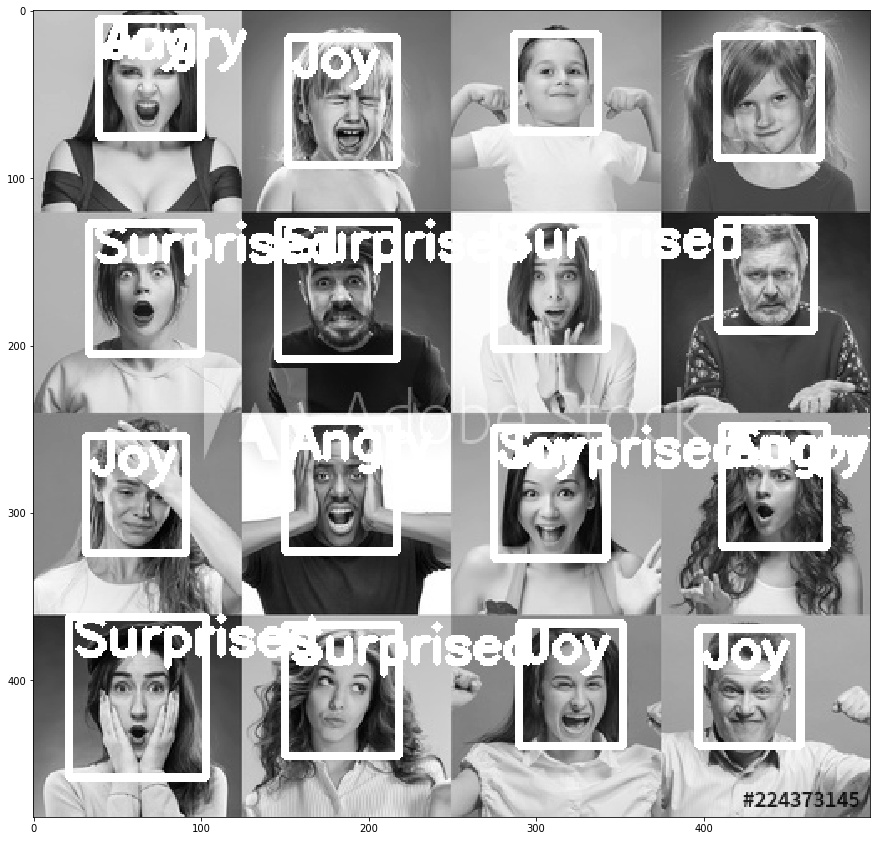

In [11]:
plt.figure(figsize=(15, 15))
plt.imshow(img_to_disp, cmap='gray')
plt.show()